In [22]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import pickle
from sklearn.model_selection import GridSearchCV
import seaborn as sns


# Load the datasets
train_data = pd.read_csv('train_dataset.csv')
test_data = pd.read_csv('test_dataset.csv')


In [23]:
train_data.isnull().sum()


team                       0
targeted_productivity      0
smv                        0
wip                      423
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
month                      0
quarter_Quarter1           0
quarter_Quarter2           0
quarter_Quarter3           0
quarter_Quarter4           0
quarter_Quarter5           0
department_finishing       0
department_finishing       0
department_sweing          0
day_Monday                 0
day_Saturday               0
day_Sunday                 0
day_Thursday               0
day_Tuesday                0
day_Wednesday              0
actual_productivity        0
dtype: int64

In [24]:
test_data.isnull().sum()

team                      0
targeted_productivity     0
smv                       0
wip                      83
over_time                 0
incentive                 0
idle_time                 0
idle_men                  0
no_of_style_change        0
no_of_workers             0
month                     0
quarter_Quarter1          0
quarter_Quarter2          0
quarter_Quarter3          0
quarter_Quarter4          0
quarter_Quarter5          0
department_finishing      0
department_finishing      0
department_sweing         0
day_Monday                0
day_Saturday              0
day_Sunday                0
day_Thursday              0
day_Tuesday               0
day_Wednesday             0
dtype: int64

In [25]:
train_data = train_data.dropna()
test_data = test_data.dropna()

In [26]:
train_data

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
1,7,0.65,30.10,909.0,7080,0,0.0,0,1,59.0,...,0,0,1,0,0,0,1,0,0,0.535678
3,1,0.65,22.53,762.0,5040,0,0.0,0,1,42.0,...,0,0,1,0,0,0,0,0,1,0.581131
4,4,0.70,30.10,767.0,3300,50,0.0,0,1,57.0,...,0,0,1,1,0,0,0,0,0,0.790003
6,3,0.80,19.87,924.0,9900,50,0.0,0,0,55.0,...,0,0,1,0,0,0,0,0,1,0.800274
8,9,0.80,22.52,1086.0,6960,50,0.0,0,0,58.0,...,0,0,1,0,0,0,0,0,1,0.799963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,10,0.75,22.52,1413.0,10080,69,0.0,0,0,56.0,...,0,0,1,0,0,1,0,0,0,0.800021
1012,9,0.80,29.12,14.0,6960,0,0.0,0,0,58.0,...,0,0,1,0,0,0,1,0,0,0.497885
1013,9,0.75,29.12,1070.0,6960,34,0.0,0,0,58.0,...,0,0,1,0,0,0,0,1,0,0.750593
1014,4,0.80,30.10,891.0,7140,38,0.0,0,1,59.0,...,0,0,1,1,0,0,0,0,0,0.800137


In [27]:
test_data

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
2,3,0.70,30.10,1057.0,0,40,0.0,0,1,58.0,...,0,0,0,1,0,0,0,0,0,1
5,1,0.75,22.94,1502.0,6960,81,0.0,0,0,58.0,...,1,0,0,1,0,1,0,0,0,0
6,7,0.75,30.10,709.0,6960,45,0.0,0,1,58.0,...,0,0,0,1,1,0,0,0,0,0
8,4,0.75,26.82,1082.0,6840,65,0.0,0,0,57.0,...,0,0,0,1,0,0,1,0,0,0
11,3,0.80,29.40,1156.0,6840,50,0.0,0,0,57.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,4,0.80,30.10,437.0,7080,32,0.0,0,2,59.0,...,0,0,0,1,0,0,0,1,0,0
175,12,0.80,15.26,470.0,4080,63,0.0,0,0,34.0,...,0,0,0,1,0,0,0,0,0,1
176,6,0.50,23.41,1379.0,2280,0,0.0,0,1,39.0,...,0,0,0,1,0,1,0,0,0,0
177,5,0.50,26.82,711.0,7080,23,0.0,0,1,59.0,...,0,0,0,1,0,0,1,0,0,0


In [28]:
train_data.describe()
test_data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,...,97.000000,97.0,97.0,97.0,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,6.525773,0.707216,23.623402,1235.061856,7046.288660,44.917526,3.092784,0.381443,0.175258,52.737113,...,0.041237,0.0,0.0,1.0,0.175258,0.237113,0.206186,0.164948,0.123711,0.092784
std,3.310629,0.114107,6.567571,2094.627651,3337.003496,25.662745,30.460385,3.756781,0.456671,9.153805,...,0.199871,0.0,0.0,0.0,0.382162,0.427522,0.406667,0.373062,0.330962,0.291636
min,1.000000,0.350000,11.410000,171.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.500000,...,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.650000,18.790000,808.000000,5490.000000,30.000000,0.000000,0.000000,0.000000,54.000000,...,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,0.750000,22.940000,1067.000000,6960.000000,45.000000,0.000000,0.000000,0.000000,56.500000,...,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,0.800000,26.820000,1227.000000,10080.000000,63.000000,0.000000,0.000000,0.000000,58.000000,...,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12.000000,0.800000,48.680000,21385.000000,25920.000000,113.000000,300.000000,37.000000,2.000000,59.000000,...,1.000000,0.0,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


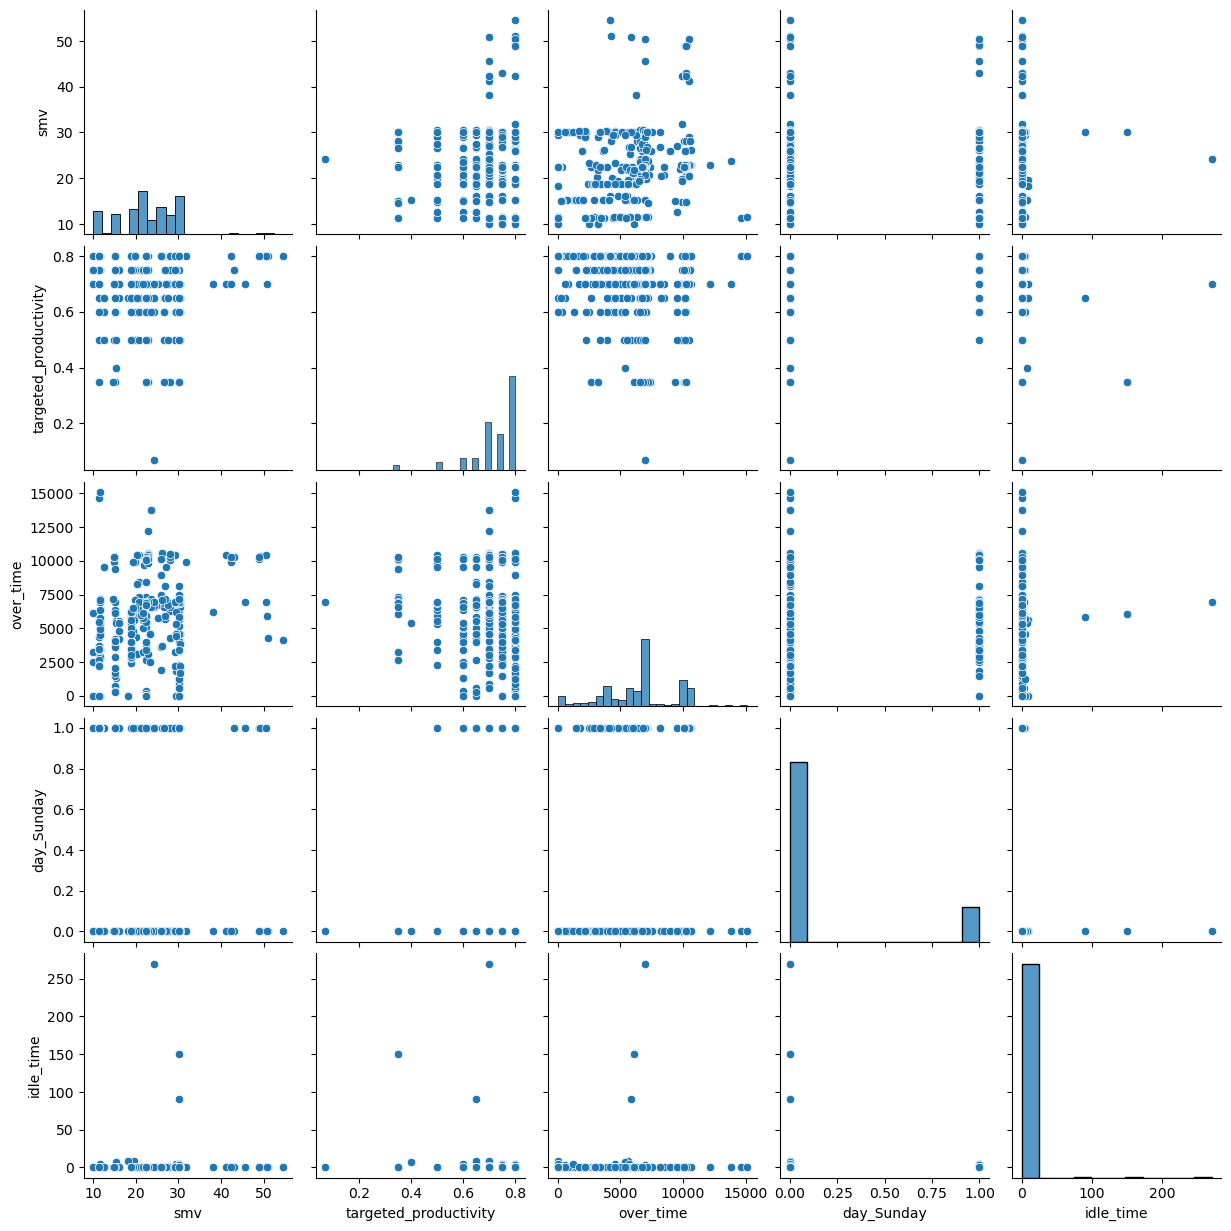

In [29]:
sns.pairplot(train_data[['smv','targeted_productivity','over_time','day_Sunday','idle_time']])

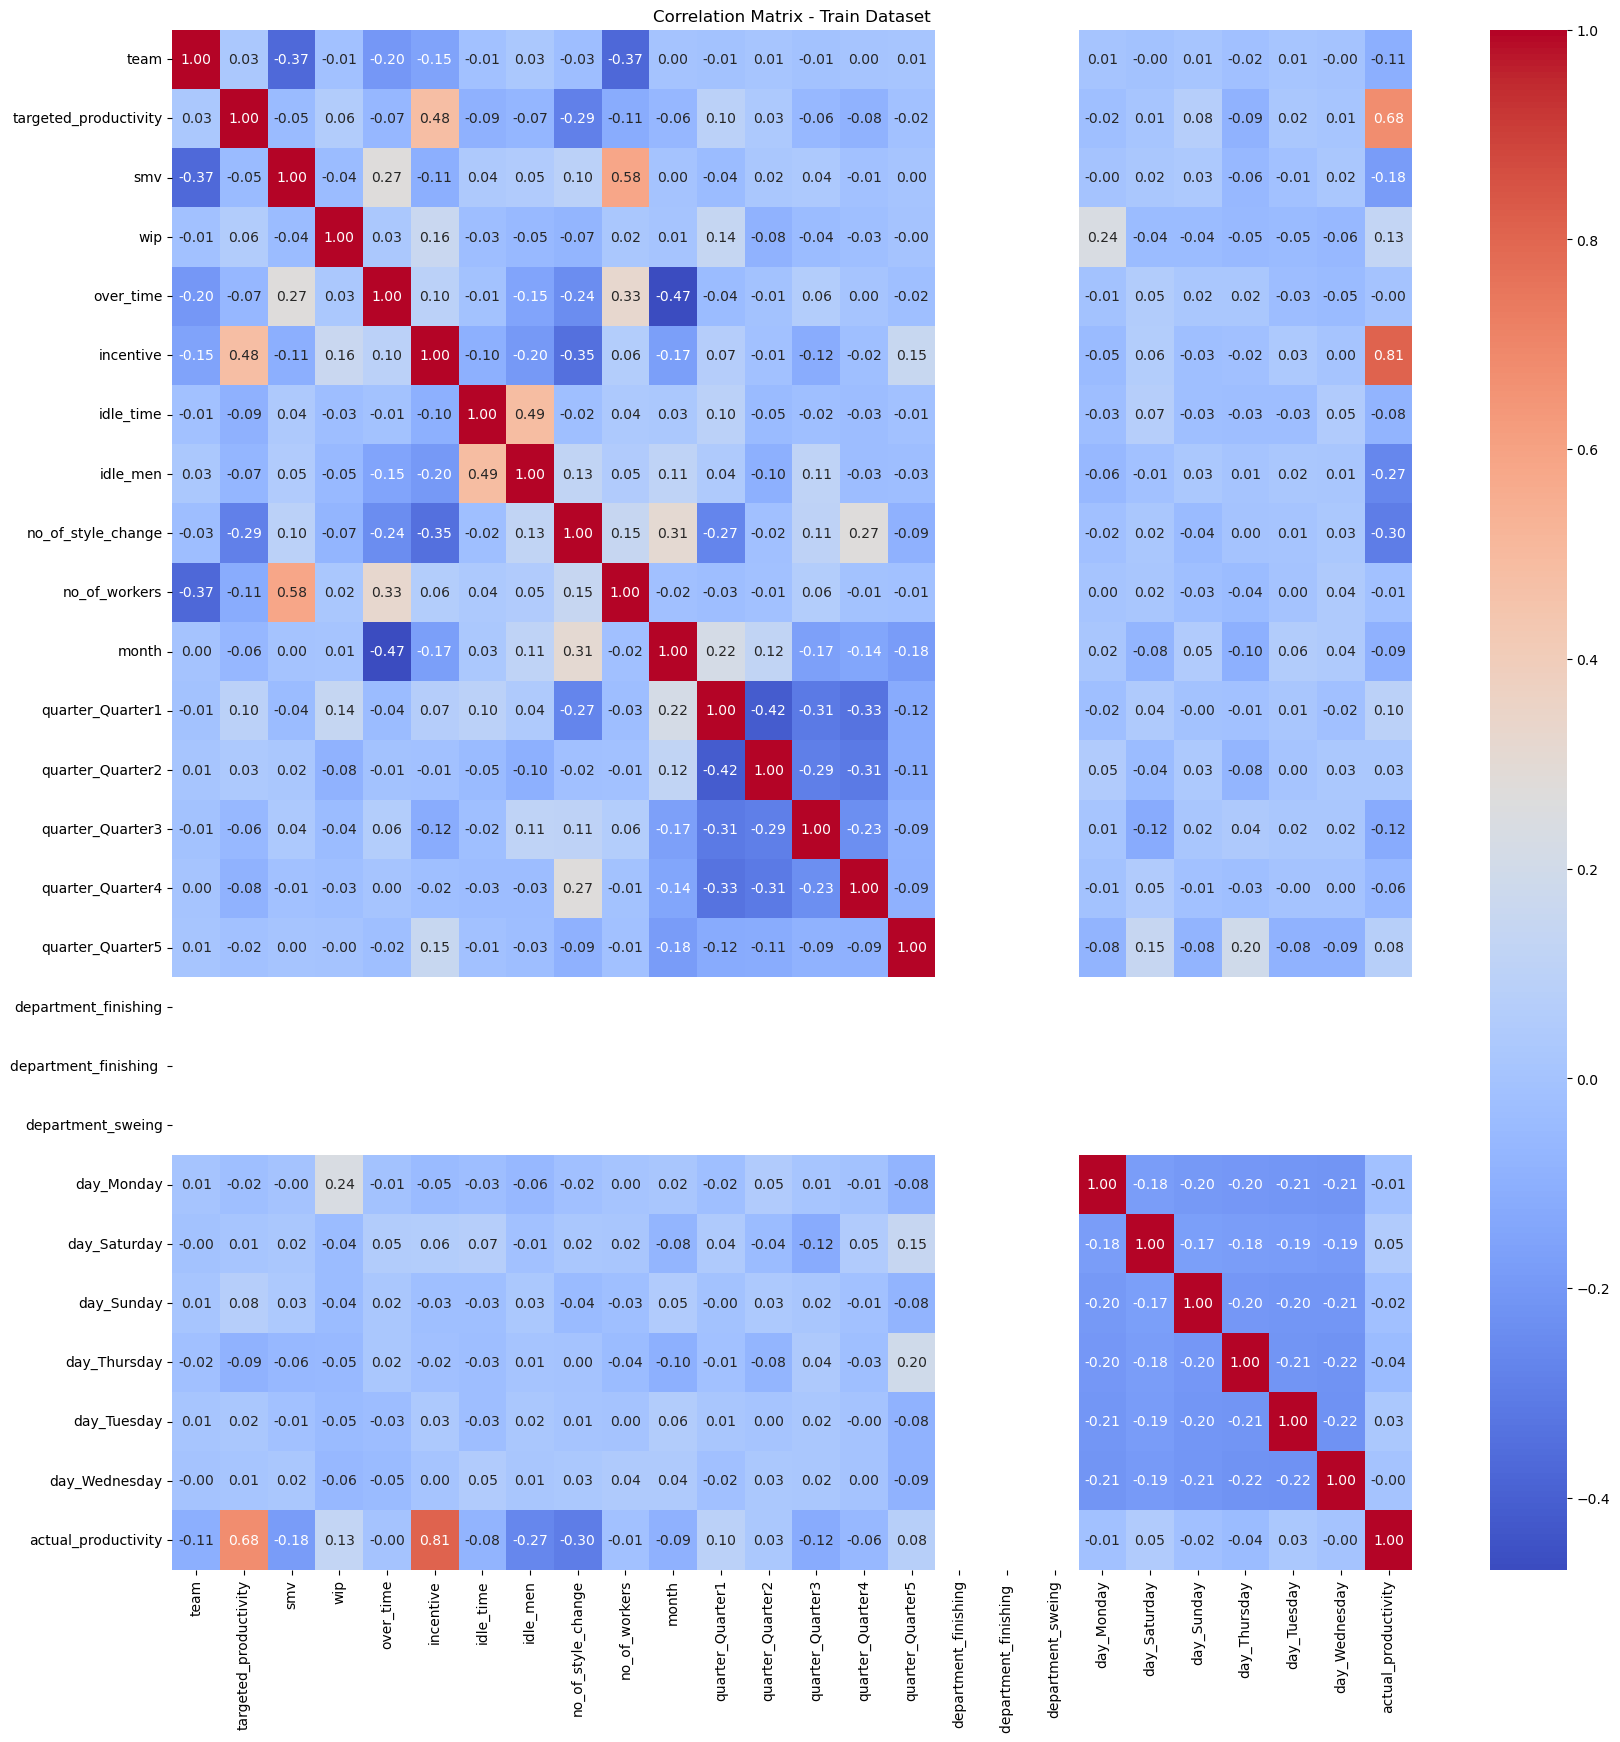

In [30]:
# Correlation matrix for the training dataset
train_corr = train_data.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(train_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - Train Dataset')
plt.show()


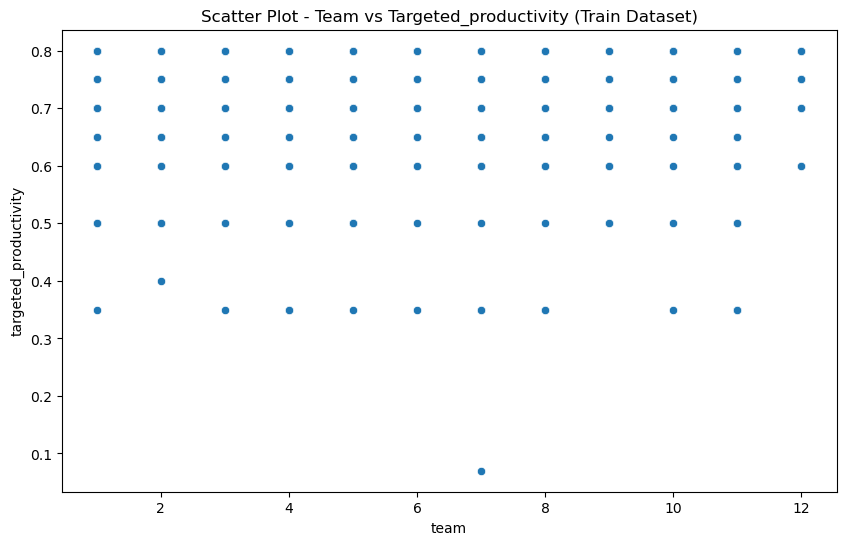

In [31]:
# Scatter plot between Age and Balance in the training dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x ='team', y ='targeted_productivity')
plt.title('Scatter Plot - Team vs Targeted_productivity (Train Dataset)')
plt.xlabel('team')
plt.ylabel('targeted_productivity')
plt.show()


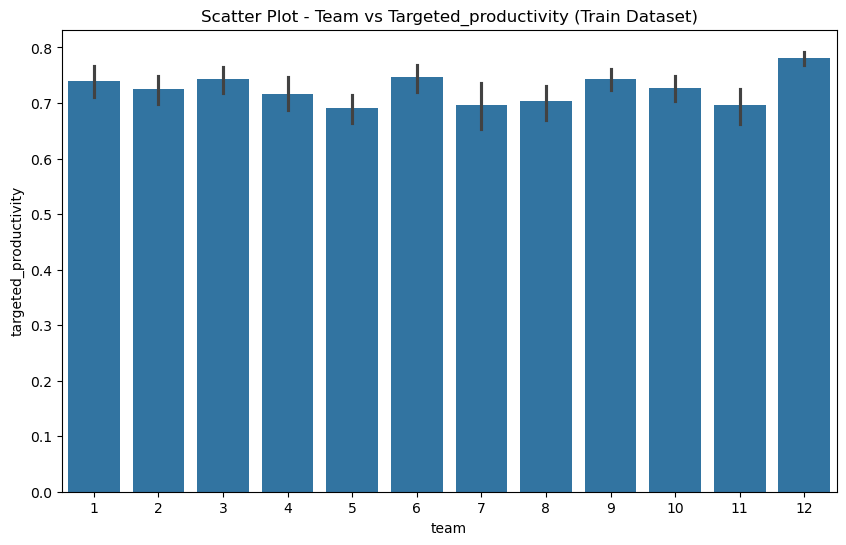

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_data, x ='team', y ='targeted_productivity')
plt.title('Scatter Plot - Team vs Targeted_productivity (Train Dataset)')
plt.xlabel('team')
plt.ylabel('targeted_productivity')
plt.show()

In [33]:
# Separate features and target variable from the training data
X_train = train_data.drop('actual_productivity', axis=1)
y_train = train_data['actual_productivity']

# Identify numerical and categorical columns
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()


In [34]:
# Create a preprocessor for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [35]:
# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)

# Process the test data
X_test_processed = preprocessor.transform(test_data)

# Split the training data into training and validation sets
X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(X_train_processed, y_train, test_size=0.2, random_state=42)


In [36]:
# Initialize the models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(random_state=42)
gradient_boosting_model = GradientBoostingRegressor(random_state=42)

In [37]:
# Train the models
linear_model.fit(X_train_split, y_train_split)
random_forest_model.fit(X_train_split, y_train_split)
gradient_boosting_model.fit(X_train_split, y_train_split)

GradientBoostingRegressor(random_state=42)

In [38]:
# Make predictions on the validation set
linear_pred = linear_model.predict(X_valid_split)
random_forest_pred = random_forest_model.predict(X_valid_split)
gradient_boosting_pred = gradient_boosting_model.predict(X_valid_split)

In [75]:
# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"--- {model_name} ---")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    print("\n")



In [77]:

# Evaluate Linear Regression
evaluate_model(y_valid_split, linear_pred, "Linear Regression")

# Evaluate Random Forest Regressor
evaluate_model(y_valid_split, random_forest_pred, "Random Forest Regressor")

# Evaluate Gradient Boosting Regressor
evaluate_model(y_valid_split, gradient_boosting_pred, "Gradient Boosting Regressor")



--- Linear Regression ---
Mean Squared Error: 0.00
Mean Absolute Error: 0.05
R^2 Score: 0.78


--- Random Forest Regressor ---
Mean Squared Error: 0.01
Mean Absolute Error: 0.04
R^2 Score: 0.77


--- Gradient Boosting Regressor ---
Mean Squared Error: 0.00
Mean Absolute Error: 0.05
R^2 Score: 0.77




In [41]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}



In [42]:
# Initialize the GridSearchCV
grid_search = GridSearchCV(gradient_boosting_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train_split, y_train_split)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:")
print(best_params)

Best Parameters:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [43]:
# Make predictions on the test set using the best model
test_predictions = best_model.predict(X_test_processed)

In [44]:
if 'target' in test_data.columns:
    y_test = test_data['target']
    mse = mean_squared_error(y_test, test_predictions)
    mae = mean_absolute_error(y_test, test_predictions)
    r2 = r2_score(y_test, test_predictions)
    
    print(f"--- Test Set Evaluation ---")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R^2 Score: {r2:.2f}")
else:
    print("Predictions for the test set:")
    print(test_predictions)

Predictions for the test set:
[0.73425992 0.85146123 0.74896967 0.84204609 0.80558795 0.66185973
 0.66557531 0.7829573  0.5497855  0.65202512 0.75703261 0.71365584
 0.69874803 0.67315983 0.84851177 0.41210078 0.76961849 0.99547708
 0.45470914 0.55898492 0.79164013 0.65661851 0.80623045 0.85770571
 0.67008805 0.49173206 0.78778051 0.77143207 0.76212858 0.84361158
 0.89889772 0.79815897 0.83007468 0.65541663 0.83462927 0.9413036
 0.7889919  0.84210342 0.41795196 0.68448498 0.90773823 0.83773808
 0.60880678 0.80569508 0.8352868  0.80702998 0.82516912 0.98605734
 0.74591605 0.74796289 0.45678532 0.60202588 0.72795173 0.60112798
 0.78004339 0.54991725 0.79900358 0.57167227 0.81593871 0.52964173
 0.7396168  0.76750716 0.81352471 0.71325378 0.8008892  0.75485944
 0.43205349 0.8079955  0.38041732 0.84982661 0.59746913 0.84625663
 0.75985069 0.42751268 0.80623045 0.81004433 0.85597144 0.76739128
 0.51163383 0.47789669 0.61842628 0.59294461 0.43879634 0.78911617
 0.60831976 0.79258274 0.89447403

In [45]:
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Create a sample dataset
X, y = make_regression(n_samples=100, n_features=1, noise=0.1)

# Train a model
model = LinearRegression()
model.fit(X, y)

# Save the model to a file
with open('linear_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [46]:
# Load the model from the file
with open('linear_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model to make predictions
predictions = loaded_model.predict(X)
print(predictions)


[ -13.36355712   33.26479801   -7.74210107   25.6639233   -15.65964199
   29.70247807   12.18993539    9.35609917    1.89375822   80.83645759
   10.17058656  -44.59447076    3.8321976   -30.5793292  -103.72235145
   13.55976463  -46.73872898  -14.44288624  -25.66250751   15.40194292
   36.81026788   17.97369588   -3.83492099   26.3007061   -32.0407877
  -16.58774089  -11.8268435    39.38482548    7.94646025  -65.93677555
   48.09618127   21.91158522   14.80119174   24.86014519   14.34250676
   13.36111005  -27.26388764   12.15492126   62.77661004  -33.49357388
  -21.07700649   45.10546423   -0.19069097   50.87012092   -6.61417224
  -26.77672227   52.57867574  -12.56119994  -59.67200764  -16.38538701
  -33.1204337     1.98391831   30.25032148   -2.0403037    17.77740812
    9.56303373   16.49489544  -69.40775073   -8.19712178    6.91643633
  -21.97884582  -11.322096    -10.19616473   -0.39716613  -21.66171374
  -89.9464107    17.1687039    13.24757877  -49.0288238    19.46480543
  -18.5